## PartialDerivative Op

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@6d87e0

This `Op` calculates the partial derivative in a given dimension. This `Op` differs from [`derivativeGauss`](derivativeGauss.ipynb) in that this `Op` does **not** perform a gaussian during the partial derivative calculation. Let's see how this `Op` is called: 

In [2]:
ij.op().help("partialDerivative")

Available operations:
	(RandomAccessibleInterval out?) =
	net.imagej.ops.filter.derivative.PartialDerivativeRAI(
		RandomAccessibleInterval out?,
		RandomAccessibleInterval in,
		int dimension)

All we need to run the `Op` is an input image (on which we will calculate the partial derivatives at each pixel), a dimension along which we will calculate the partial derivatives, and (optionally) an output image (if we do not preallocate and pass one, the `Op` will generate and return one). Let's test this out:

[INFO] Populating metadata
[INFO] Populating metadata


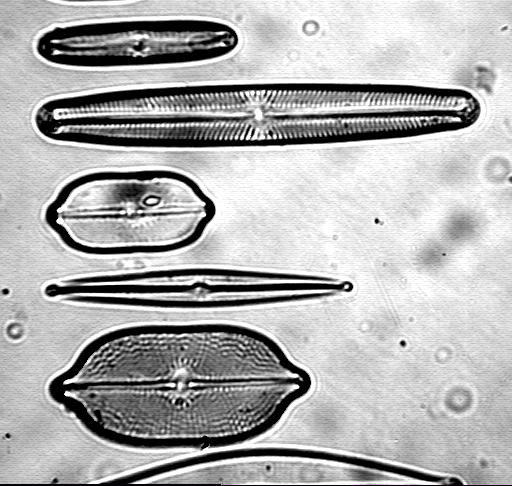

In [3]:
input = ij.scifio().datasetIO().open("http://imagej.net/images/Diatoms.jpg")

ij.notebook().display(input)

Let's calculate the partial derivative of this clown along the y (first) dimension of the image. First, though, we will convert the image data values into `FloatType` for a smoother derivative image (otherwise the derivatives will round to the nearest integer, providing a uninformative image):

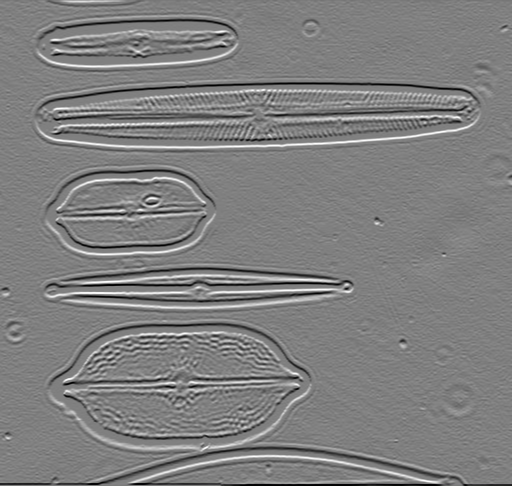

In [4]:
converted = ij.op().run("convert.float32", input)
output = ij.op().create().img(converted)

dimension = 1 as int
ij.op().run("partialDerivative", output, converted, dimension)

ij.notebook().display(output)